<a href="https://colab.research.google.com/github/anfalsal/Anfal/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1 :

we need to create a 2 × 50 2×50 matrix 𝑋 X where calculating svd does not yield the same result as calculating pca. Then, we'll plot the columns of 𝑋 X on a 2D plane, showing both the leading principal component and the leading left singular vector.

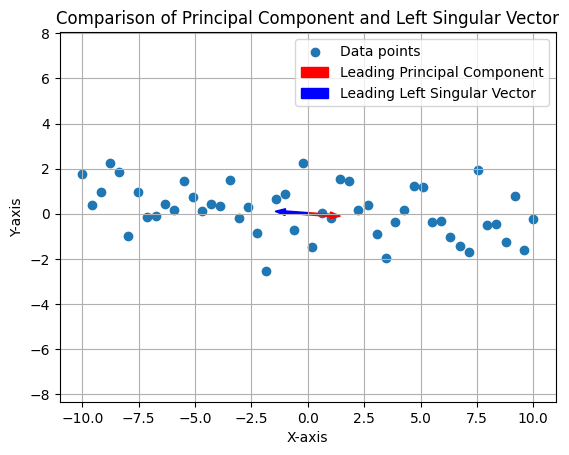

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2x50 matrix X
np.random.seed(0)
X = np.array([np.linspace(-10, 10, 50), np.random.normal(0, 1, 50)]) #create 𝑋 such that one dimension has a larger spread than the other, ensuring that PCA and SVD directions differ.

# Step 2: Calculate SVD
U, S, VT = np.linalg.svd(X)
leading_singular_vector = U[:, 0]

# Step 3: Calculate PCA
cov_matrix = np.cov(X)
eigvals, eigvecs = np.linalg.eig(cov_matrix)
leading_principal_component = eigvecs[:, np.argmax(eigvals)]

# Step 4: Plot the points and the vectors
plt.scatter(X[0, :], X[1, :], label='Data points')
plt.arrow(0, 0, leading_principal_component[0], leading_principal_component[1],
          color='r', width=0.1, label='Leading Principal Component')
plt.arrow(0, 0, leading_singular_vector[0], leading_singular_vector[1],
          color='b', width=0.1, label='Leading Left Singular Vector')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Comparison of Principal Component and Left Singular Vector')
plt.grid()
plt.axis('equal')
plt.show()

In the plot, the data points (blue dots) are spread primarily along the horizontal axis (X-axis), indicating that the first dimension of 𝑋 X has greater variance than the second. The red arrow represents the leading principal component, which points in the direction of maximum variance in the data, aligning horizontally due to the high spread along the X-axis. The blue arrow shows the leading left singular vector from SVD, which, unlike the principal component, considers both dimensions of 𝑋 X equally in its decomposition. This slight difference in direction between the principal component and the left singular vector illustrates that SVD and PCA do not always yield the same leading direction, especially when variance differs significantly between dimensions.

# Q2 :

Saving circle.png to circle.png


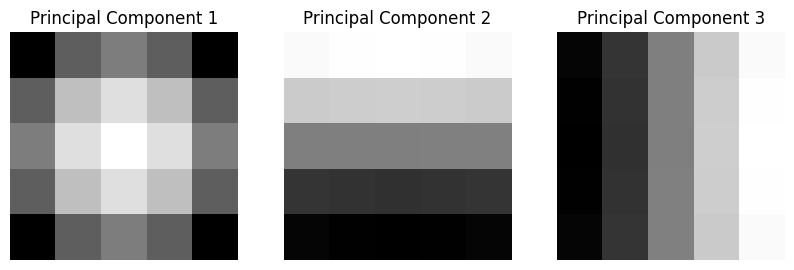

In [2]:
# Step 1: Upload the Image
from google.colab import files
uploaded = files.upload()

# Step 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.color import rgb2gray

# Step 3: Load the image and convert to grayscale
image_path = 'circle.png'  # Use the filename of the uploaded image
image = imread(image_path)
if image.ndim == 3:  # If the image is RGB, convert to grayscale
    image = rgb2gray(image)
image = (image * 255).astype(np.uint8)  # Normalize and convert to uint8 if necessary

# Step 4: Extract overlapping 5x5 patches
patch_size = (5, 5)
patches = extract_patches_2d(image, patch_size)

# Step 5: Reshape patches to 25 size vectors and concatenate them into a matrix
patches = patches.reshape(patches.shape[0], -1)  # Each patch is now a 25-dimensional vector

# Step 6: Perform PCA on the matrix of patches
pca = PCA(n_components=3)
pca.fit(patches)
principal_components = pca.components_

# Step 7: Reshape the first 3 principal components back to 5x5 for visualization
components_reshaped = [component.reshape(5, 5) for component in principal_components]

# Step 8: Display the components as images
plt.figure(figsize=(10, 3))
for i, component in enumerate(components_reshaped):
    plt.subplot(1, 3, i + 1)
    plt.imshow(component, cmap='gray')
    plt.title(f'Principal Component {i + 1}')
    plt.axis('off')
plt.show()

**The first component**  captures the direction of maximum variance in the data. In this case, it appears as a blocky grayscale pattern with distinct vertical and horizontal regions of different intensities.This pattern represents the most common features across all patches in the image, which could be influenced by the overall shape and contrast in the patches.
**Principal Component 2** reflect the transition from the circle’s boundary to the background. However, since we’re using small
5
×
5
 patches, it doesn’t capture a distinct edge but rather an average horizontal variation.
**The third component** shows a strong vertical gradient, with varying shades from left to right.

# Q3 :

code for performing SVD, reconstructing the image using different numbers of principal components, calculating the reconstruction error, and computing the compression rate.

Saving numbers.mat to numbers.mat


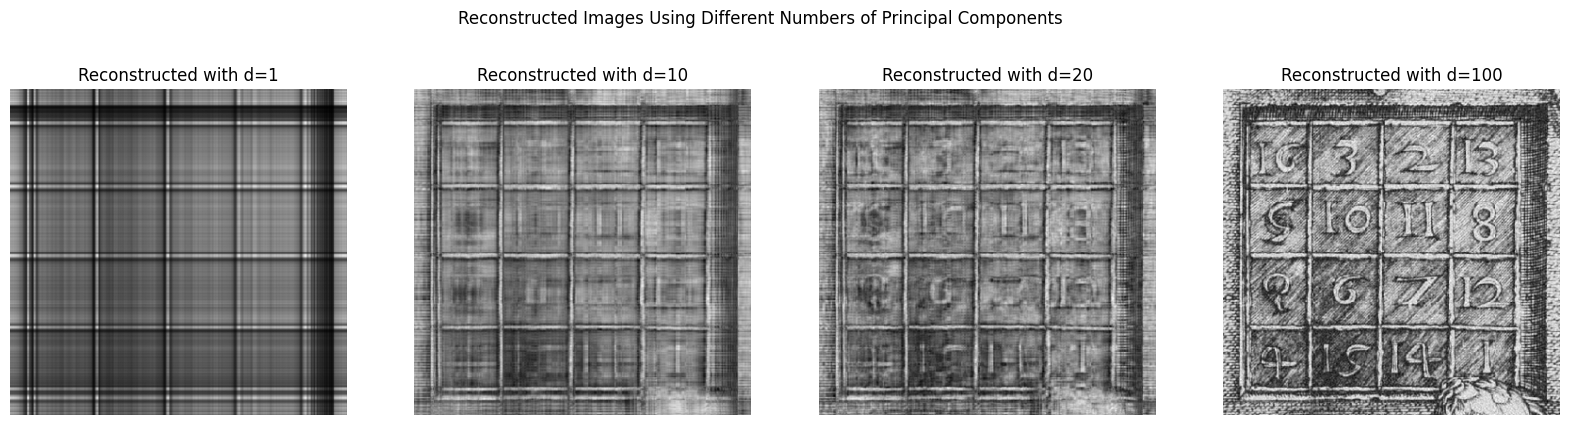

Reconstruction Errors:
d = 1: 0.4508
d = 10: 0.3586
d = 20: 0.3154
d = 100: 0.1457

Compression Rates:
d = 1: 0.0057
d = 10: 0.0569
d = 20: 0.1138
d = 100: 0.5692


In [3]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()

# Step 2: Load the .mat file
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
file_path = list(uploaded.keys())[0]  # Get the uploaded file name dynamically
mat_contents = scipy.io.loadmat(file_path)
Xd = np.array(mat_contents['mat'])  # Treat the 'mat' variable as a data matrix

# Step 3: Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(Xd, full_matrices=False)

# Function to reconstruct the matrix using the first d principal components
def reconstruct_matrix(U, S, VT, d):
    # Use only the top d components for reconstruction
    Ud = U[:, :d]
    Sd = np.diag(S[:d])
    VdT = VT[:d, :]

    # Reconstruct the matrix with d components
    Xd_approx = Ud @ Sd @ VdT
    return Xd_approx

# Set the principal components to use for each reconstruction
d_values = [1, 10, 20, 100]

# Plot the reconstructed images for each d value
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, d in enumerate(d_values):
    Xd_approx = reconstruct_matrix(U, S, VT, d)
    axes[i].imshow(Xd_approx, cmap='gray')
    axes[i].set_title(f"Reconstructed with d={d}")
    axes[i].axis('off')

plt.suptitle("Reconstructed Images Using Different Numbers of Principal Components")
plt.show()

# Calculate reconstruction errors for each d
reconstruction_errors = {}
for d in d_values:
    Xd_approx = reconstruct_matrix(U, S, VT, d)
    error = np.linalg.norm(Xd - Xd_approx, 'fro') / np.linalg.norm(Xd, 'fro')
    reconstruction_errors[d] = error

# Calculate compression rates for each d
compression_rates = {d: (d * (U.shape[0] + VT.shape[1]) + d) / (U.shape[0] * VT.shape[1]) for d in d_values}

# Display results
print("Reconstruction Errors:")
for d, error in reconstruction_errors.items():
    print(f"d = {d}: {error:.4f}")

print("\nCompression Rates:")
for d, rate in compression_rates.items():
    print(f"d = {d}: {rate:.4f}")


**The results of the SVD**-based image reconstruction show how using different numbers of principal components (d = 1, 10, 20, 100) affects the image quality and reconstruction accuracy. As we increase the number of components, the reconstructed image becomes more detailed and closer to the original. With only 1 component, the image appears as a rough, grid-like pattern, capturing minimal information about the original structure. By 10 components, some outlines of numbers become visible, though the details are still vague. With 20 components, the numbers become more recognizable, and by 100 components, the image is highly detailed and almost identical to the original.

The **reconstruction error** decreases as more components are included, showing that higher d values result in better approximation. Specifically, the error drops from 0.4508 with 1 component to 0.1457 with 100 components, indicating improved fidelity. However, the **compression rate** also decreases with more components, going from 0.0057 for d=1 to 0.5692 for d=100. This trade-off between reconstruction quality and storage efficiency demonstrates that retaining more components improves accuracy but requires more data, affecting compression.

# Q4:

in this question i will use the **Complete Pokémon Dataset** from  Kaggle Datasets









Saving pokemon.csv to pokemon (1).csv


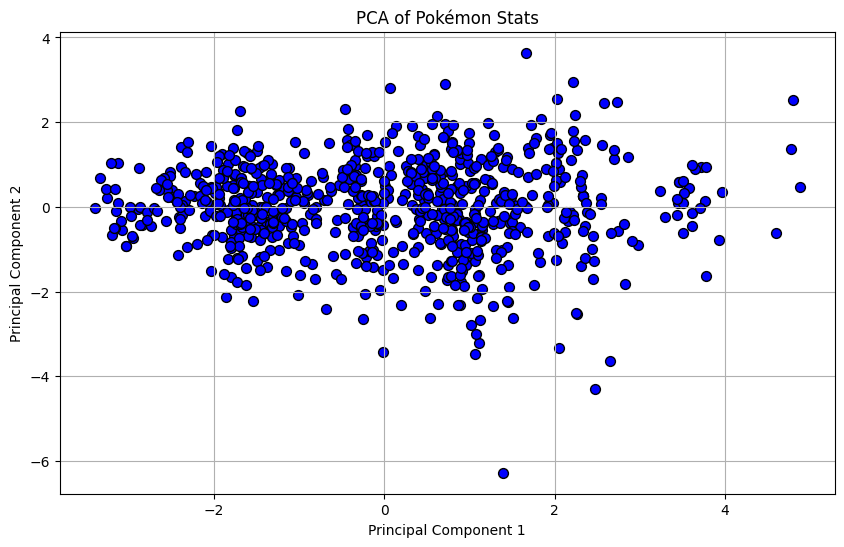

In [5]:
# Step 1: Upload the file in Google Colab
from google.colab import files
uploaded = files.upload()

# Step 2: Load the Pokémon dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the uploaded file
df = pd.read_csv('pokemon.csv')

# Step 3: Select numerical features for PCA
numerical_features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = df[numerical_features]

# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Perform PCA to reduce to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Step 6: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 7: Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Stats')
plt.grid()
plt.show()


The scatter plot shows each Pokémon as a point in a two-dimensional space defined by the first two principal components (PC1 and PC2). These principal components capture the main patterns of variation in the Pokémon's stats (HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed) by projecting the six-dimensional data into two dimensions. Points that are close together in the plot represent Pokémon with similar stat distributions, while points that are far apart represent Pokémon with differing stat profiles. The clustering of points near the center suggests that many Pokémon share a similar balance in these stats, while outliers may represent Pokémon with unique or extreme stat combinations. This plot can be used to explore natural groupings and potential relationships among the Pokémon based on their stats.